In [1]:
import pandas as pd
import openpyxl
from openpyxl import Workbook
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우에서 사용 (리눅스에서는 'NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 제대로 표시되게 설정

In [16]:
sea_level = pd.read_csv('./data/sealevel.csv') # 해수면 관련 데이터 읽어들이기
sea_group = sea_level.groupby('Year').mean() # 월별로 있는 데이터 년도별로 묶은 후 반영
sea_group.head()

,TotalWeightedObservations,GMSL_noGIA,StdDevGMSL_noGIA,SmoothedGSML_noGIA,GMSL_GIA,StdDevGMSL_GIA,SmoothedGSML_GIA,SmoothedGSML_GIA_sigremoved
Year,,,,,,,,
1993,319044.908649,-34.605405,87.603784,-34.629459,-34.483784,87.607027,-34.507568,-34.508378
1994,323836.882162,-30.951081,87.412432,-30.898919,-30.584324,87.418919,-30.532432,-30.531892
1995,317986.154865,-28.645946,85.336757,-27.971351,-28.019459,85.337838,-27.359189,-27.358108
1996,323979.240278,-26.596389,84.194444,-26.140833,-25.744167,84.188611,-25.288611,-25.287222
1997,321345.634054,-22.682432,97.989189,-22.345946,-21.591081,98.000000,-21.254865,-21.255676


In [29]:
sea_difference = sea_group[['SmoothedGSML_GIA_sigremoved']]
sea_difference = sea_difference.rename(columns = {'SmoothedGSML_GIA_sigremoved' : '20년간 평균과의 차이(mm)'})
sea_difference.head()

,20년간 평균과의 차이
Year,
1993,-34.508378
1994,-30.531892
1995,-27.358108
1996,-25.287222
1997,-21.255676


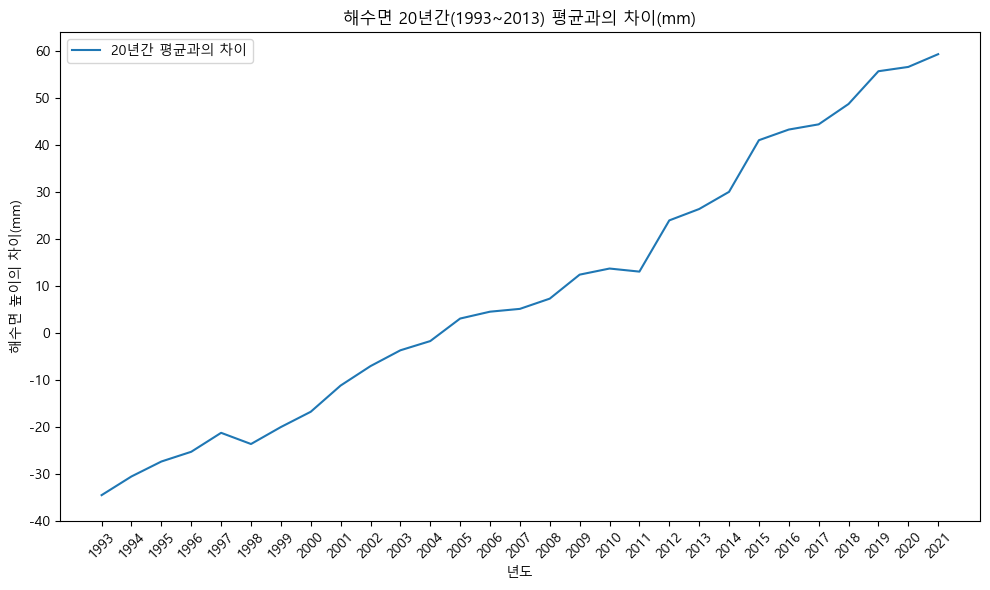

In [36]:
# 해수면 차이 라인 그래프 그리기
plt.figure(figsize = (10, 6))
sns.lineplot(data = sea_difference)

# 그래프 꾸미기
plt.title('해수면 20년간(1993~2013) 평균과의 차이(mm)')
plt.xlabel('년도')
plt.xticks(sea_difference.index)
plt.yticks([-40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60])
plt.ylabel('해수면 높이의 차이(mm)')
plt.xticks(rotation = 45)  # x축 년도 레이블 회전

# 그래프 표시
plt.tight_layout()
plt.show()

In [2]:
sea_temp_init = pd.read_csv('./data/바다온도.csv')
sea_temp_init.head()

,date,sst,clim_91-20,ano_91-20
0,1979-01-01,20.08,20.24,-0.15
1,1979-01-02,20.08,20.24,-0.16
2,1979-01-03,20.09,20.25,-0.16
3,1979-01-04,20.10,20.25,-0.15
4,1979-01-05,20.12,20.26,-0.14


In [72]:
sea_temp_init['date'] = pd.to_datetime(sea_temp_init['date']) # 년-월-일 형태로 있는 datetime형태라고 표시
#sea_temperature = sea_temp_init[sea_temp_init['date'].dt.year >= 1993] # 1993년 이후 데이터만 반영
sea_temperature = sea_temp_init
sea_temperature['date'] = sea_temperature['date'].dt.to_period('M') # 월까지 데이터를 표시
sea_temperature

,date,sst,clim_91-20,ano_91-20
0,1979-01,20.08,20.24,-0.15
1,1979-01,20.08,20.24,-0.16
2,1979-01,20.09,20.25,-0.16
3,1979-01,20.10,20.25,-0.15
4,1979-01,20.12,20.26,-0.14
...,...,...,...,...
16789,2024-12,20.54,20.18,0.36
16790,2024-12,20.54,20.19,0.36
16791,2024-12,20.54,20.19,0.35
16792,2024-12,20.54,20.19,0.35


In [73]:
sea_temp_month = sea_temperature.groupby('date').mean() # 월까지 표시된 데이터 월별로 묶어서 평균 구함
sea_temp_month = sea_temp_month.round({'sst': 2, 'clim_91-20': 2, 'ano_91-20': 2}) # 소수점 2자리까지
sea_temp_month.head(24)

,sst,clim_91-20,ano_91-20
date,,,
1979-01,20.15,20.32,-0.16
1979-02,20.27,20.47,-0.19
1979-03,20.31,20.53,-0.22
1979-04,20.31,20.50,-0.19
1979-05,20.17,20.41,-0.24
1979-06,20.17,20.35,-0.19
1979-07,20.14,20.38,-0.24
1979-08,20.18,20.43,-0.25
1979-09,20.17,20.35,-0.18


In [89]:
month_reset_index = sea_temp_month.reset_index() # 인덱스 리셋으로 열로 바꾸기
clim_91_20 = month_reset_index[['date', 'clim_91-20']].head(12) # 필요한 칼럼들을 가진 데이터프레임 생성
clim_91_20['date'] = clim_91_20['date'].dt.month.astype(str) + '월' # 'date' 열에서 월을 추출하여 월을 붙인 형식으로 변환
clim_91_20 = clim_91_20.rename(columns = {'clim_91-20' : '91~20년도 평균'}) 
clim_91_20

,date,91~20년도 평균
0,1월,20.32
1,2월,20.47
2,3월,20.53
3,4월,20.50
4,5월,20.41
5,6월,20.35
6,7월,20.38
7,8월,20.43
8,9월,20.35
9,10월,20.20


In [88]:
month_reset_index = sea_temp_month.reset_index() # 인덱스 리셋으로 열로 바꾸기
year_2023 = month_reset_index[month_reset_index['date'].dt.year == 2023] # 2023년 데이터 추출
year_2024 = month_reset_index[month_reset_index['date'].dt.year == 2024] # 2024년 데이터 추출

year_2023['date'] = year_2023['date'].dt.month.astype(str) + '월' # 'date' 열에서 월을 추출하여 월을 붙인 형식으로 변환
year_2024['date'] = year_2024['date'].dt.month.astype(str) + '월' # 'date' 열에서 월을 추출하여 월을 붙인 형식으로 변환


# 결과 확인
print("Year 2023 data:")
print(year_2023.head())

print("\nYear 2024 data:")
print(year_2024.head())

Year 2023 data:
    date    sst  clim_91-20  ano_91-20
528   1월  20.53       20.32       0.21
529   2월  20.68       20.47       0.22
530   3월  20.84       20.53       0.30
531   4월  20.86       20.50       0.36
532   5월  20.77       20.41       0.36

Year 2024 data:
    date    sst  clim_91-20  ano_91-20
540   1월  20.97       20.32       0.66
541   2월  21.06       20.47       0.59
542   3월  21.07       20.53       0.54
543   4월  21.04       20.50       0.54
544   5월  20.94       20.41       0.52


C:\Users\USER\AppData\Local\Temp\ipykernel_43956\3052158036.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2023['date'] = year_2023['date'].dt.month.astype(str) + '월' # 'date' 열에서 월을 추출하여 월을 붙인 형식으로 변환
C:\Users\USER\AppData\Local\Temp\ipykernel_43956\3052158036.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2024['date'] = year_2024['date'].dt.month.astype(str) + '월' # 'date' 열에서 월을 추출하여 월을 붙인 형식으로 변환


In [90]:
year_2020 = month_reset_index[month_reset_index['date'].dt.year == 2020] # 2020년 데이터 추출
year_1980 = month_reset_index[month_reset_index['date'].dt.year == 1980] # 1980년 데이터 추출

year_2020['date'] = year_2020['date'].dt.month.astype(str) + '월' # 'date' 열에서 월을 추출하여 월을 붙인 형식으로 변환
year_1980['date'] = year_1980['date'].dt.month.astype(str) + '월' # 'date' 열에서 월을 추출하여 월을 붙인 형식으로 변환

C:\Users\USER\AppData\Local\Temp\ipykernel_43956\210241630.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2020['date'] = year_2020['date'].dt.month.astype(str) + '월' # 'date' 열에서 월을 추출하여 월을 붙인 형식으로 변환
C:\Users\USER\AppData\Local\Temp\ipykernel_43956\210241630.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_1980['date'] = year_1980['date'].dt.month.astype(str) + '월' # 'date' 열에서 월을 추출하여 월을 붙인 형식으로 변환


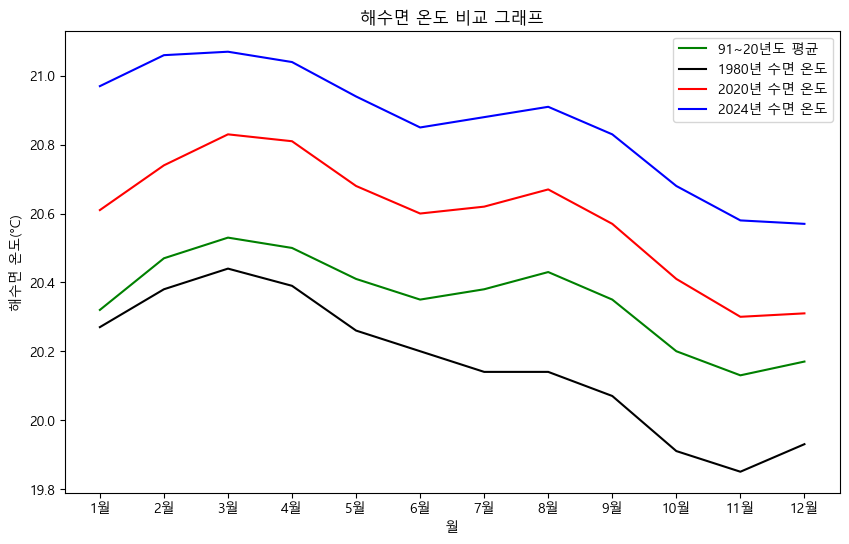

In [92]:
plt.figure(figsize=(10, 6)) # 크기 설정

#그래프 그리기
plt.plot(clim_91_20['date'], clim_91_20['91~20년도 평균'], label = '91~20년도 평균', color = 'green') # clim_91_20 그래프 그리기
plt.plot(year_1980['date'], year_1980['sst'], label = '1980년 수면 온도', color = 'black') # year_1980 그래프 그리기
plt.plot(year_2020['date'], year_2020['sst'], label = '2020년 수면 온도', color = 'red') # year_2020 그래프 그리기
plt.plot(year_2024['date'], year_2024['sst'], label = '2024년 수면 온도', color = 'blue') # year_2024 그래프 그리기

# 제목, x,y 축 표시, 범례 표시
plt.title('해수면 온도 비교 그래프')
plt.xlabel('월')
plt.ylabel('해수면 온도(°C)')
plt.legend()

# 그래프 표시
plt.show()

In [ ]:
# 'date' 컬럼을 datetime 형식으로 변환
sea_temperature['date'] = pd.to_datetime(sea_temperature['date'])

# 연도-월 형식으로 'date' 컬럼을 변환하여 새로운 컬럼 생성
sea_temperature['date'] = sea_temperature['date'].dt.to_period('M')